<a href="https://colab.research.google.com/github/adammoss/bnn_hmc/blob/main/results/MLSST_ensemble_lenet_64.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import sys
import shutil
import subprocess
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
nruns = 10
model = 'lenet'
image_size = 64

In [3]:
!nvidia-smi

Wed Sep  7 11:31:40 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    25W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
!pip install astro-datasets --upgrade
!pip install tensorflow_datasets --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for astro-datasets: filename=astro_datasets-0.0.10-py3-none-any.whl size=15992 sha256=79ab5eae12a4c587e95ac9c8197c2821609ab25aee7b35d0ef2b1fcc3de2448b
  Stored in directory: /root/.cache/pip/wheels/33/b2/9d/97c264f6addbd178fe1c8ff119617e1515cb8c0d0f220605cf
Successfully built astro-datasets
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
shutil.rmtree('bnn_hmc', ignore_errors=True)

In [6]:
!git clone https://github.com/adammoss/bnn_hmc

Cloning into 'bnn_hmc'...
remote: Enumerating objects: 648, done.
remote: Counting objects: 100% (117/117), done.
remote: Compressing objects: 100% (106/106), done.
remote: Total 648 (delta 77), reused 26 (delta 11), pack-reused 531
Receiving objects: 100% (648/648), 1.27 MiB | 13.67 MiB/s, done.
Resolving deltas: 100% (458/458), done.


In [7]:
!pip install --upgrade https://storage.googleapis.com/jax-releases/cuda111/jaxlib-0.1.65+cuda111-cp37-none-manylinux2010_x86_64.whl
!pip install jax==0.2.12

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 189.4 MB 18 kB/s 
  Attempting uninstall: jaxlib
    Found existing installation: jaxlib 0.3.15+cuda11.cudnn805
    Uninstalling jaxlib-0.3.15+cuda11.cudnn805:
      Successfully uninstalled jaxlib-0.3.15+cuda11.cudnn805
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 590 kB 14.2 MB/s 
  Created wheel for jax: filename=jax-0.2.12-py3-none-any.whl size=682487 sha256=f3e861d8117c2c29431f0e53dc530a4734258c0015392dcbb68eee456359aa62
  Stored in directory: /root/.cache/pip/wheels/f6/4d/e5/73eec5070b77f25664c67bd793d4eb97f41bbf9be7afafd15e
Successfully built jax
  Attempting uninstall: jax
    Found existing installation: jax 0.3.17
    Uninstalling jax-0.3.17:
      Successfully uninstalled jax-0.3.17


In [8]:
!pip install dm-haiku==0.0.5.dev0 optax==0.0.6 chex==0.0.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 284 kB 15.2 MB/s 
     |████████████████████████████████| 96 kB 5.0 MB/s 
     |████████████████████████████████| 51 kB 613 kB/s 


In [9]:
for i, root in enumerate(glob.glob('/content/runs/*/')):
  shutil.rmtree(root, ignore_errors=True)

In [10]:
for i in range(nruns):
 base_cmd = ['python3', 'bnn_hmc/scripts/run_sgd.py', '--seed=%s' % i, '--weight_decay=10', '--dir=runs/sgd/mlsst/%s/' % i, 
 '--dataset_name=mlsst/Y10', '--model_name=%s' % model, '--init_step_size=1e-5', '--num_epochs=200', 
 '--eval_freq=5', '--batch_size=100', '--save_freq=5', '--optimizer=Adam', '--image_size=%s' % image_size, 
 '--subset_train_to=20000', '--scaling=asinh']
 train_cmd = base_cmd + ['--train_split=train', '--test_split=validation']
 eval_cmd = base_cmd + ['--eval_split=test']
 print(' '.join(train_cmd))
 p = subprocess.run(train_cmd, capture_output=True)
 print(p.stdout.decode('utf8'))
 p = subprocess.run(eval_cmd, capture_output=True)
 print(p.stdout.decode('utf8'))

python3 bnn_hmc/scripts/run_sgd.py --seed=0 --weight_decay=10 --dir=runs/sgd/mlsst/0/ --dataset_name=mlsst/Y10 --model_name=lenet --init_step_size=1e-5 --num_epochs=200 --eval_freq=5 --batch_size=100 --save_freq=5 --optimizer=Adam --image_size=64 --subset_train_to=20000 --scaling=asinh --train_split=train --test_split=validation
JAX sees the following devices: [GpuDevice(id=0, process_index=0)]
TF sees the following devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
Dataset mlsst downloaded and prepared to ~/tensorflow_datasets/mlsst/Y10/1.0.0. Subsequent calls will reuse this data.
Starting from random initialization with provided seed
---  --------  ----------------  ---------------  ----------  -------------------  --------------  --------------  --------
  i         t    train/accuracy    test/accuracy    test/nll  test/ens_accuracy    test/ens_nll    test/ens_ece          lr
---  --------  ----------------  ---------------  ----------  ------------------- 

In [18]:
base_cmd = ['python3', 'bnn_hmc/scripts/run_sgd.py', '--seed=%s' % 0, '--weight_decay=10', '--dir=runs/sgd/mlsst/%s/' % 0, 
 '--dataset_name=mlsst/Y10', '--model_name=%s' % model, '--init_step_size=1e-5', '--num_epochs=200', 
 '--eval_freq=5', '--batch_size=100', '--save_freq=5', '--optimizer=Adam', '--image_size=%s' % image_size, 
 '--subset_train_to=20000', '--scaling=asinh']
eval_cmd = base_cmd + ['--eval_split=test', '--ensemble_root=/content/runs/sgd/mlsst/*/*']
print(' '.join(eval_cmd))
p = subprocess.run(eval_cmd, capture_output=True)
print(p.stdout.decode('utf8'))

python3 bnn_hmc/scripts/run_sgd.py --seed=0 --weight_decay=10 --dir=runs/sgd/mlsst/0/ --dataset_name=mlsst/Y10 --model_name=lenet --init_step_size=1e-5 --num_epochs=200 --eval_freq=5 --batch_size=100 --save_freq=5 --optimizer=Adam --image_size=64 --subset_train_to=20000 --scaling=asinh --eval_split=test --ensemble_root=/content/runs/sgd/mlsst/*/*
JAX sees the following devices: [GpuDevice(id=0, process_index=0)]
TF sees the following devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
Continuing the run from the last saved checkpoint
{'accuracy': DeviceArray(0.73819804, dtype=float32), 'nll': 0.6830523, 'ece': 0.08632730914422672}



In [27]:
softmax = []
for i, root in enumerate(glob.glob('/content/runs/sgd/mlsst/*/*/')):
  metrics = np.load(root + '/metrics.npy', allow_pickle=True)
  if not np.isfinite(metrics.item()['nll']) or metrics.item()['nll'] > 1:
    # Do not include any runs which have diverged
    continue
  data = np.load(root + '/test_set.npy')
  prediction = np.load(root + '/predictions.npy')  
  softmax.append(np.squeeze(prediction))
softmax = np.array(softmax)

In [28]:
mean_softmax = np.mean(softmax, axis=0)
ensemble_accuracy = np.mean(np.argmax(mean_softmax, axis=-1) == data)
print('Ensemble accuracy', ensemble_accuracy)

Ensemble accuracy 0.7381980640357408


In [29]:
def uncertainty(softmax):
  # Per example softmax with shape(num_examples, num_classes)
  predictive_entropy = 0
  single_pass_entropy = 0
  for i in range(softmax.shape[1]):
    # Sum over classes
    predictive_entropy += -np.mean(softmax[:,i])*np.log(np.mean(softmax[:,i]))
    single_pass_entropy += -softmax[:,i]*np.log(softmax[:,i])
  single_pass_entropy = np.mean(single_pass_entropy)
  mutual_info = predictive_entropy - single_pass_entropy
  return predictive_entropy, single_pass_entropy, mutual_info

In [30]:
predictive_entropies = [] 
single_pass_entropies = []
mutual_infos = []
for i in range(softmax.shape[1]):
  predictive_entropy, single_pass_entropy, mutual_info = uncertainty(softmax[:,i,:])
  predictive_entropies.append(predictive_entropy)
  single_pass_entropies.append(single_pass_entropy)
  mutual_infos.append(mutual_info)
print('Predictive entropy:', np.mean(predictive_entropies), np.std(predictive_entropies))
print('Single pass entropy:', np.mean(single_pass_entropies), np.std(single_pass_entropies))
print('Mutual info:', np.mean(mutual_infos), np.std(mutual_infos))

Predictive entropy: 0.7923654265014201 0.25632305853067144
Single pass entropy: 0.6690214 0.21687704
Mutual info: 0.12334395448638408 0.06755531036837242


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


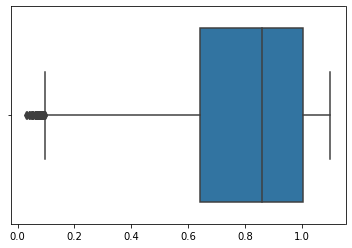

In [31]:
sns.boxplot(predictive_entropies)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


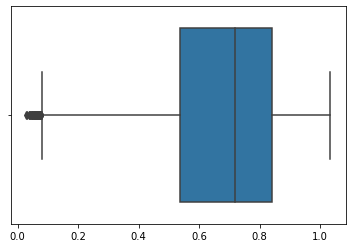

In [32]:
sns.boxplot(single_pass_entropies)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


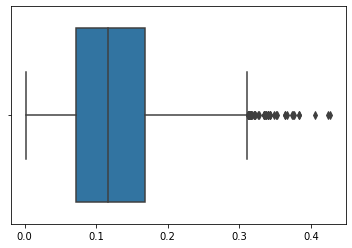

In [33]:
sns.boxplot(mutual_infos)
plt.show()